<a href="https://colab.research.google.com/github/Vitaly-lv/DS/blob/main/Task3_dmrf_OOP_%D0%9B%D0%B5%D0%BE%D0%BD%D1%82%D1%8C%D0%B5%D0%B2%D0%92%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [ ]:
import requests
import pandas as pd
from tqdm.auto import tqdm
import sqlite3
import seaborn as sns

# Класс загрузчик ID


In [ ]:
# сделал на примере зарузки 1000 строк
class DomIdLoader:
    def __init__(self):
        self.offset_ = 0
        self.limit_ = 1000
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.objects_data = []

    def get_ids(self):
      

        paramz = {
                'offset': self.limit_,
                'limit': self.limit_,
                'sortField':'devId.devShortCleanNm',
                'sortType':'asc',
                'objStatus':'0',
            }
        res = requests.get(self.url, params=paramz)

        self.objects_data = res.json().get('data').get('list')
        self.objects_data = [x.get('objId') for x in self.objects_data]
        self.objects_data = list(self.objects_data)
    
    def show_ids(self):
      return self.objects_data    


In [ ]:
load_cl = DomIdLoader()
load_cl.get_ids()

In [ ]:
len(load_cl.show_ids())

1000

#Класс формирования датафрейма

In [ ]:
class ObjectInfoExtractor:
    def __init__(self):
      self.objects_list = []

    def load_data(self, ids):
      for obj in tqdm(ids):
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{obj}'
        res = requests.get(url)
        self.objects_list.append(res.json())


    def df_converter(self, ids):
      self.load_data(ids)
      return pd.json_normalize([x.get('data') for x in self.objects_list])    
      

In [ ]:
load_row = ObjectInfoExtractor()

In [ ]:
load_row.df_converter(load_cl.show_ids())

  0%|          | 0/1000 [00:00<?, ?it/s]

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,complexShortNm
0,42638,482825,18,"г Ижевск, район Индустриальный, ул Репина, д. 35",Утро на Репина.Жилой дом №4,11,18,128,2024-09-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26460,89997,77,"г Москва, район Бабушкинский, ул Менжинского, ...","""Клубный дом на Менжинского""",17,20,0,2023-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47158,604823,16,г Зеленодольск,NaN,6,6,76,2023-03-31,Панель,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3311,6108,46,"г Курск, улица Кати Зеленко - Володарского, ко...",жилой дом по улице Кати Зеленко - Володарского,19,19,137,2023-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3310,6108,46,"г Курск, улица Кати Зеленко - Володарского, ко...",жилой дом по улице Кати Зеленко - Володарского,8,8,8,2023-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,46574,584391,31,"г Старый Оскол, мкр Центральный, строение 4","ЖК ""Оскол Сити""",12,13,132,2023-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,45289,551852,18,"г Ижевск, ул Васнецова",Жиvoй комплекс Настроение Настроение ЖК Настро...,18,18,212,2023-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,47474,624966,66,"г Екатеринбург, д. Группа многоквартирных жилы...",NaN,5,5,220,2023-12-31,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,47458,614717,66,"г Екатеринбург, д. 1.1",NaN,5,5,315,2023-12-31,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = load_row.df_converter(load_cl.show_ids())

  0%|          | 0/1000 [00:00<?, ?it/s]

#Класс сохранения данных

In [ ]:
class Saver:
    def __init__(self, data):
      self.data = data

    def save_csv(self):
      self.data.to_csv('data.csv')
      return print("Файл csv сохранен")

    def save_xl(self):
      self.data.to_excel('data.xlsx')
      return print("Файл xlsx сохранен")

    def save_sql(self):
      df1 = self.data.copy()
      df1 = df1.drop(columns=['metro.colors',
                              'photoRenderDTO',
                              'objectTransportInfo'])
      conn = sqlite3.connect('test_database')
      df1.to_sql('df_sql', conn, if_exists='replace', index = False)
      conn.commit()
      conn.close()
      return print("БД сохранена")

In [ ]:
saving = Saver(df)
saving.save_csv()

Файл csv сохранен


In [ ]:
saving.save_xl()

Файл xlsx сохранен


In [ ]:
saving.save_sql()

БД сохранена


#Класс визуализации

In [ ]:
class Visualizer:
    def __init__(self, data):
      self.data = data
     

    def make_boxplot(self):
      df2 = self.data[['region','objPriceAvg']]
      df2.dropna(inplace=True)
      df2 = df2.groupby('region', as_index=False)['objPriceAvg'].mean()
      sns.catplot(y='objPriceAvg',data=df2, kind='box', height=4, aspect=2);
    
     

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


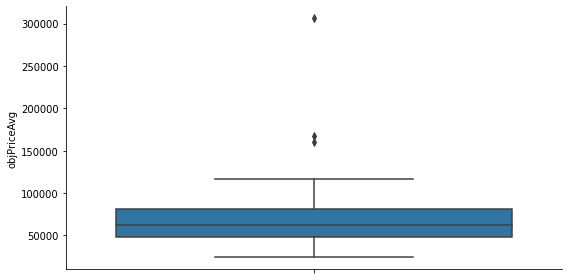

In [ ]:
vis = Visualizer(df)
vis.make_boxplot()